In [4]:
import numpy 
import numpy as np

# Objets de type array

Les objets de type array correspondent à des tableaux à une ou plusieurs dimensions et permettent d’effectuer du
calcul vectoriel. La fonction array() convertit un conteneur (comme une liste ou un tuple) en un objet de type array.

## Fonction array

In [5]:
import numpy as np
a = [1, 2, 3]
ta = np.array(a)

In [6]:
type(ta)

numpy.ndarray

Un objet array ne contient que des données homogènes, c’est-à-dire d’un type identique.
Il est possible de créer un objet array à partir d’une liste constituée d’entiers et de floats, mais toutes les
valeurs seront alors comprises par NumPy comme des floats

In [7]:
import numpy as np
a = [1, 2.2, 3, 'bonjour']
ta = np.array(a)

ta

array(['1', '2.2', '3', 'bonjour'], dtype='<U32')

In [8]:
import numpy as np
a = [1, 2.2, 3]
ta = np.array(a)

ta

array([1. , 2.2, 3. ])

In [9]:
ta.dtype

dtype('float64')

In [10]:
import numpy as np
a = [1, 2, 3]
ta = np.array(a)

ta.dtype

dtype('int64')

In [11]:
np.array([3])**456

array([924717970289206433])

## Fonction arange



In [12]:
np.arange(100000000-1, 0, -1)

array([99999999, 99999998, 99999997, ...,        3,        2,        1])

## Différence avec les listes ou tuple
La différence fondamentale entre un objet array à une dimension et une liste (ou un tuple) est que celui-ci est
considéré comme un vecteur. Par conséquent, on peut effectuer des opérations vectorielles élément par élément sur ce type d’objet, ce qui est bien commode lorsqu’on analyse de grandes quantités de données

* opérations mathématiques
* fonctions mathématiques

In [13]:
a = [1, 2, 3]
ta = np.array(a)

b = [4, 20, 13]
tb = np.array(b)

ta ** tb

array([      1, 1048576, 1594323])

In [14]:
np.sin(ta)

array([0.84147098, 0.90929743, 0.14112001])

In [15]:
import math

math.sin(ta)

TypeError: only length-1 arrays can be converted to Python scalars

In [16]:
ta[0] = 14.8
ta

array([14,  2,  3])

## Méthodes sur les tableaux

* np.min, np.max, np.sum, 
* np.mean, np.var (variance), np.std (standard deviation/ ecart type)

In [17]:
b = [4, 20, 13]
tb = np.array(b)

np.min(tb)
tb.min()

4

In [18]:
tb.mean()
tb.std()
tb.var()

42.88888888888889

In [19]:
tb.sum()
tb.prod()

1040

In [20]:
tb.sort()
tb

array([ 4, 13, 20])

In [21]:
b = [4, 20, 13]
tb = np.array(b)

tb.argsort()

array([0, 2, 1])

## Indices

* Comme les listes : entiers ou slice (tranche) avec start:stop:step
* Tableau d'entiers
* Tableau booléen

In [22]:
b = [4, 20, 13, 45, 2, 6, 86, 2]
tb = np.array(b)

tb

array([ 4, 20, 13, 45,  2,  6, 86,  2])

In [23]:
tb[5]

6

In [24]:
tb[1:4]

array([20, 13, 45])

In [25]:
indices = np.array([4, 2, 3])
tb[indices]

array([ 2, 13, 45])

In [26]:
b = [4, 20, 13, 45]
tb = np.array(b)

tb

array([ 4, 20, 13, 45])

In [27]:
masque = np.array([False, True, False, True])

tb[masque]

array([20, 45])

In [28]:
(tb>10)

array([False,  True,  True,  True])

In [29]:
tb[tb>10]

array([20, 13, 45])

In [30]:
tb != 13

array([ True,  True, False,  True])

IndexError: index 14 is out of bounds for axis 0 with size 4

In [32]:
tb+10

array([14, 30, 23, 55])

## Fonctions avec des tableaux

* En général, pas de problèmes
* si cela ne fonctionne pas à cause d'un if : soit un masque soit np.vectorize


Opération sur les tableaux de booleens : & (and),| (or) , ~ (not)

Il n'est pas possible d'utiliser if sur un tableau ni and ou or. 

In [102]:
# Tout fonctionne
def gaussienne(x, sigma):
    return np.exp(-x**2/(2*sigma**2))

sigma = 0.3
x = np.linspace(-1, 1, 10)

gaussienne(x, sigma)


array([0.00386592, 0.03470859, 0.18002174, 0.53940751, 0.93371212,
       0.93371212, 0.53940751, 0.18002174, 0.03470859, 0.00386592])

In [37]:
def my_abs(x):
    if x>=0:
        return x
    else:
        return -x
    
my_abs(-3)

3

In [38]:
my_abs(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [39]:
def my_abs(x):
    out = x.copy()
    out[x<0] = -x[x<0]
    return out

In [40]:
my_abs(x)

array([1.        , 0.77777778, 0.55555556, 0.33333333, 0.11111111,
       0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])

In [44]:
def my_abs(tx):
    out = np.zeros(len(tx))
    for i, x in enumerate(tx):
        if x>0:
            out[i] = x
        else:
            out[i] = -x
    return out

my_abs(x)

array([1.        , 0.77777778, 0.55555556, 0.33333333, 0.11111111,
       0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])

In [42]:
x[x>0]

array([0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])

In [46]:
def my_abs_nombre(x):
    if x>=0:
        return x
    else:
        return -x
    
my_abs_tableau = np.vectorize(my_abs_nombre)

In [47]:
my_abs_tableau(x)

array([1.        , 0.77777778, 0.55555556, 0.33333333, 0.11111111,
       0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.        ])

In [52]:
#if x>0 and x<0.5:
masque = (x>0) & (x<0.5)    
masque

array([False, False, False, False, False,  True,  True, False, False,
       False])

In [61]:
(x<0) | (x>.5)

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True])

In [62]:
~(x<0)

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [ ]:
cond1 = True
cond2 = False
# cond1 and cond2
if cond1:
    return cond2
else:
    return False

In [60]:
import math

y = -1

if (y>0)  & (math.sqrt(y)>2):
    print('Bonjour')


ValueError: math domain error

In [59]:
math.sqrt(2)

## Concaténation d’arrays

np.concatenate((t1, t2, ...])

In [63]:
np.concatenate((ta, tb))

array([14,  2,  3,  4, 20, 13, 45])

# Tableaux multidimensionels

* fonction np.array
* a.shape dimensions
* Méthodes de calcul sur les arrays et l’argument axis (a.mean(axis=...))
* np.zeros, np.ones, np.full

In [103]:
l = [[1, 4, 6], [3, 5, 9], [3, 6, 8], [11, 56, 78]]
l[1][1]

5

In [104]:
a = np.array(l)
a

array([[ 1,  4,  6],
       [ 3,  5,  9],
       [ 3,  6,  8],
       [11, 56, 78]])

In [105]:
a[1, 1]

5

In [106]:
a[0:2, 1:3]

array([[4, 6],
       [5, 9]])

In [107]:
a[:2, 1:]

array([[4, 6],
       [5, 9]])

In [108]:
for i in range(0, 2):
    for j in range(1, 3):
        print(a[i, j])

4
6
5
9


In [109]:
a[:, 1] # extraire un colonne

array([ 4,  5,  6, 56])

In [110]:
a.shape

(4, 3)

In [111]:
a

array([[ 1,  4,  6],
       [ 3,  5,  9],
       [ 3,  6,  8],
       [11, 56, 78]])

In [112]:
a.mean(axis=0) # moyenne des colonnes

array([ 4.5 , 17.75, 25.25])

In [113]:
a.mean(axis=1) # moyenne des lignes

array([ 3.66666667,  5.66666667,  5.66666667, 48.33333333])

## Créer un tableau

* np.array
* np.zeros, np.ones
* np.arange
* np.linspace
* np.random.rand, np.random.randint, np.random.normal

A partir d'un tableau : 
* operations binaire (+, *, ...)
* .copy()
* fonction mathématiques : np.sin, ...


In [87]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [88]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [89]:
np.random.rand(4)

array([0.28700458, 0.68622182, 0.26150458, 0.93015563])

## Chargement d’un array depuis un fichier

In [91]:
np.savetxt('fichier.txt', a)

In [94]:
np.loadtxt('fichier.txt', dtype=int)

/tmp/ipykernel_2997982/1163599025.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  np.loadtxt('fichier.txt', dtype=int)


array([[ 1,  4,  6],
       [ 3,  5,  9],
       [ 3,  6,  8],
       [11, 56, 78]])

In [93]:
np.loadtxt?

# Masques booléens


# Algèbre linéaire

* @ pour la multiplication de matrices
* np.dot pour le produit scalaire
* np.linalg.inv, np.linalg.det, ... pour le opérations usuelles sur les matrices



In [95]:
a

array([[ 1,  4,  6],
       [ 3,  5,  9],
       [ 3,  6,  8],
       [11, 56, 78]])

In [97]:
b = np.array([[[1, 5], [6, 7], [1, 3]]])
b

array([[[1, 5],
        [6, 7],
        [1, 3]]])

In [98]:
a@b # __matmul__

array([[[ 31,  51],
        [ 42,  77],
        [ 47,  81],
        [425, 681]]])

In [99]:
ta = np.random.rand(5)
tb = np.random.rand(5)
np.dot(ta, tb)

1.526482653251751

In [100]:
c = np.array([[[1, 5], [6, 7]]])
np.linalg.inv(c)

array([[[-0.30434783,  0.2173913 ],
        [ 0.26086957, -0.04347826]]])

In [101]:
np.linalg.det(c)

array([-23.])

# Exercices

## Jour le plus chaud

Le fichier temperature.dat (https://python.sdv.u-paris.fr/data-files/temperatures.dat) contient un relevé de quatre températures pour chaque jour de la semaine

À l’aide du module NumPy, on souhaite déterminer quel est le jour de la semaine le plus chaud. Pour cela nous vous proposons les étapes suivantes :
1. Récupérez le nom des jours de la semaine depuis le fichier et stockez-les dans une liste days.
2. Récupérez les valeurs de températures depuis le fichier et stockez-les dans un array 2D. La fonction np.loadtxt et son argument usecols vous seront utiles.
3. Parcourez chaque ligne de la matrice, calculez la température moyenne de chaque jour puis stockez-la dans une liste mean_temps.
4. À l’aide des deux listes days et mean_temps, déterminez et aﬀichez le jour le plus chaud.




## Calcul Monte-Carlo de la surface d’un disque

La fonction np.random.rand permet de créer une distribution uniforme de points entre 0 et 1.

* Créer deux tableaux X et Y de de N variables uniforméments réparties entre -1 et 1. Pour cela on utilisera le fait que si a est entre 0 et 1, alors $2a - 1$ est entre -1 et 1.

* Créer un tableau R contenant la longueur de chaque rayon.

* Créer un tableau de booléen indiquant les points dans un cercle de rayon 1. 

* Pour calculer le nombre de valeur vraie d'un tableau de booléens, on peut utiliser la fonction sum qui va remplacer les False par 0 et les True par 1. Calculer la proportion de points dans le cercle.

* Estimer une valeur de pi à partir de l'estimation de la probabilité d'être dans le cercle en prenant N grand.

* De la même façon, évaluer le volume d’une sphère en dimension 13

In [60]:
np.random.rand(10)

array([0.300532  , 0.33887762, 0.13480932, 0.68946887, 0.57944208,
       0.64672863, 0.38340429, 0.25091658, 0.39898426, 0.86293429])

759
3.036


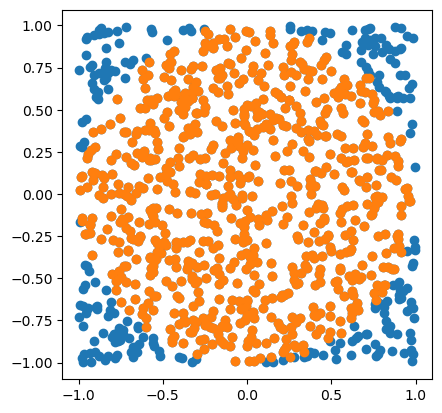

In [13]:
N = 1000
X = np.random.rand(N) * 2 - 1
Y = np.random.rand(N) * 2 - 1
import matplotlib.pyplot as plt
R = np.sqrt(X**2 + Y**2)
masque = R<=1

print(np.sum(masque))
print(np.sum(masque)/ N * 4)





plt.scatter(X, Y)
plt.scatter(X[masque], Y[masque])
plt.gca().set_aspect('equal')

In [15]:
N = 100000000
X = np.random.rand(N) * 2 - 1
Y = np.random.rand(N) * 2 - 1
import matplotlib.pyplot as plt
R = np.sqrt(X**2 + Y**2)
masque = R<=1

print(np.sum(masque))
print(np.sum(masque)/ N * 4)

78532451
3.14129804


## Calcul de la moyenne

Un tableau numpy contient les notes d’une classe. Chaque ligne correspond à un élève et chaque colone à un examen.

In [3]:
import numpy as np

N_eleves = 35
N_examens = 3

notes = np.random.rand(N_eleves, N_examens)*20

* Calculer la moyenne de chaque élève. Calculer la moyenne pour chaque examen.
* Calculer la moyenne de chaque élève, sachant que les coeficients pour les 3 examens sont de 1, 3 et 2.